This notebook is a sample code with Japanese comments.

# 2.4 ここで差がつく！　仮説に基づいて新しい特徴量を作ってみよう

# 再現性の大切さ

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

In [2]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()

np.random.randint(age_avg - age_std, age_avg + age_std)

37

In [3]:
np.random.randint(age_avg - age_std, age_avg + age_std)

40

In [4]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [5]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [6]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [7]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## 機械学習アルゴリズム

In [8]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)

In [9]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# 仮説から新しい特徴量を作る

In [10]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


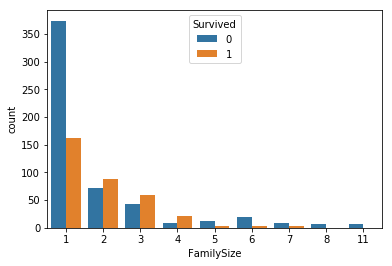

In [12]:
import seaborn as sns


data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', data = train, hue='Survived')

In [13]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

In [14]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [15]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,7.2500,0,2,0
1,1,1,38.0,71.2833,1,2,0
2,3,1,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,0,2,0
4,3,0,35.0,8.0500,0,1,1


## 予測性能の比較

In [16]:
sub = pd.read_csv('../input/titanic/gender_submission.csv')

In [17]:
clf.fit(X_train, y_train)
y_pred_familysize_isalone = clf.predict(X_test)

sub['Survived'] = list(map(int, y_pred_familysize_isalone))
sub.to_csv('submission_familysize_isalone.csv', index=False)

sub.head()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [18]:
clf.fit(X_train.drop('FamilySize', axis=1), y_train)
y_pred_isalone = clf.predict(X_test.drop('FamilySize', axis=1))

sub['Survived'] = list(map(int, y_pred_isalone))
sub.to_csv('submission_isalone.csv', index=False)

sub.head()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [19]:
clf.fit(X_train.drop('IsAlone', axis=1), y_train)
y_pred_familysize = clf.predict(X_test.drop('IsAlone', axis=1))

sub['Survived'] = list(map(int, y_pred_familysize))
sub.to_csv('submission_familysize.csv', index=False)

sub.head()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [20]:
clf.fit(X_train.drop(['FamilySize', 'IsAlone'], axis=1), y_train)
y_pred = clf.predict(X_test.drop(['FamilySize', 'IsAlone'], axis=1))

sub['Survived'] = list(map(int, y_pred))
sub.to_csv('submission.csv', index=False)

sub.head()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
